In [32]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [33]:
data = load_boston()
X = data.data
y = data.target
# with warnings.catch_warnings():
#     warnings.filterwarnings("ignore")
#     data_X, target_y = load_boston(return_X_y=True)
y = list(y)

/Users/aishakothare/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californi

In [34]:
X_df = pd.DataFrame(X, columns = data.feature_names)
X_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [35]:
Y_df = pd.DataFrame(y, columns = ['target'])
Y_df

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


## Split the range of target values into three equal parts - low, mid, and high.
## Reassign the target values into into three categorical values 0, 1, and 2, representing low, mid and high range of values, respectively.

In [36]:
sorted_df = Y_df.sort_values(by=['target'], ascending=True)

In [37]:
sorted_y=np.array_split(sorted_df,3)

In [38]:
sorted_y[0]

,target
398,5.0
405,5.0
400,5.6
399,6.3
414,7.0
...,...
113,18.7
340,18.7
60,18.7
112,18.8


In [39]:
sorted_y[1]

,target
9,18.9
54,18.9
35,18.9
11,18.9
339,19.0
...,...
65,23.5
88,23.6
173,23.6
214,23.7


In [40]:
sorted_y[2]

,target
238,23.7
481,23.7
320,23.8
314,23.8
168,23.8
...,...
166,50.0
195,50.0
283,50.0
225,50.0


In [41]:
df = pd.DataFrame(sorted_y)

/Users/aishakothare/opt/miniconda3/lib/python3.9/site-packages/pandas/core/internals/construction.py:576: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


In [42]:
sorted_y[0]["target"]=0

In [43]:
sorted_y[1]["target"]=1

In [44]:
sorted_y[2]["target"]=2

In [45]:
sorted_y

[     target
 398       0
 405       0
 400       0
 399       0
 414       0
 ..      ...
 113       0
 340       0
 60        0
 112       0
 124       0
 
 [169 rows x 1 columns],
      target
 9         1
 54        1
 35        1
 11        1
 339       1
 ..      ...
 65        1
 88        1
 173       1
 214       1
 243       1
 
 [169 rows x 1 columns],
      target
 238       2
 481       2
 320       2
 314       2
 168       2
 ..      ...
 166       2
 195       2
 283       2
 225       2
 186       2
 
 [168 rows x 1 columns]]

In [46]:
result_y=pd.concat([sorted_y[0],sorted_y[1],sorted_y[2]])

In [47]:
result_y.sort_index()

,target
0,2
1,1
2,2
3,2
4,2
...,...
501,1
502,1
503,2
504,1


## Split the dataset into 70% training set and 30% test set.

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_df,result_y, test_size=0.30, random_state=42)

In [49]:
decision_tree = DecisionTreeClassifier(random_state=0)
cross_val_score(decision_tree, X ,result_y, cv=10)

array([0.49019608, 0.84313725, 0.56862745, 0.60784314, 0.80392157,
       0.80392157, 0.88      , 0.78      , 0.66      , 0.28      ])

In [50]:
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

## Report the tree depth, number of leaves, feature importance, train score, and test score of the tree. Let the tree depth be Td.
## Visual tree diagram

In [51]:
depth = decision_tree.tree_.max_depth
depth

11

In [52]:
print('Leaves of tree: ',decision_tree.get_n_leaves())

Leaves of tree:  31


In [53]:
train_score=decision_tree.score(X_train,y_train,sample_weight=None)
test_score=decision_tree.score(X_test,y_test,sample_weight=None)

In [54]:
print('Train Score: ',train_score)
print('Test Score: ',test_score)

Train Score:  1.0
Test Score:  0.9013157894736842


In [55]:
feature_importance=decision_tree.feature_importances_
feature_importance

array([0.08044153, 0.02475428, 0.09642233, 0.        , 0.10022354,
       0.00424013, 0.014053  , 0.06230688, 0.        , 0.44536686,
       0.15445048, 0.        , 0.01774096])

In [56]:
features=pd.DataFrame(data.feature_names,feature_importance)

In [57]:
features

,0
0.080442,CRIM
0.024754,ZN
0.096422,INDUS
0.000000,CHAS
0.100224,NOX
0.004240,RM
0.014053,AGE
0.062307,DIS
0.000000,RAD
0.445367,TAX


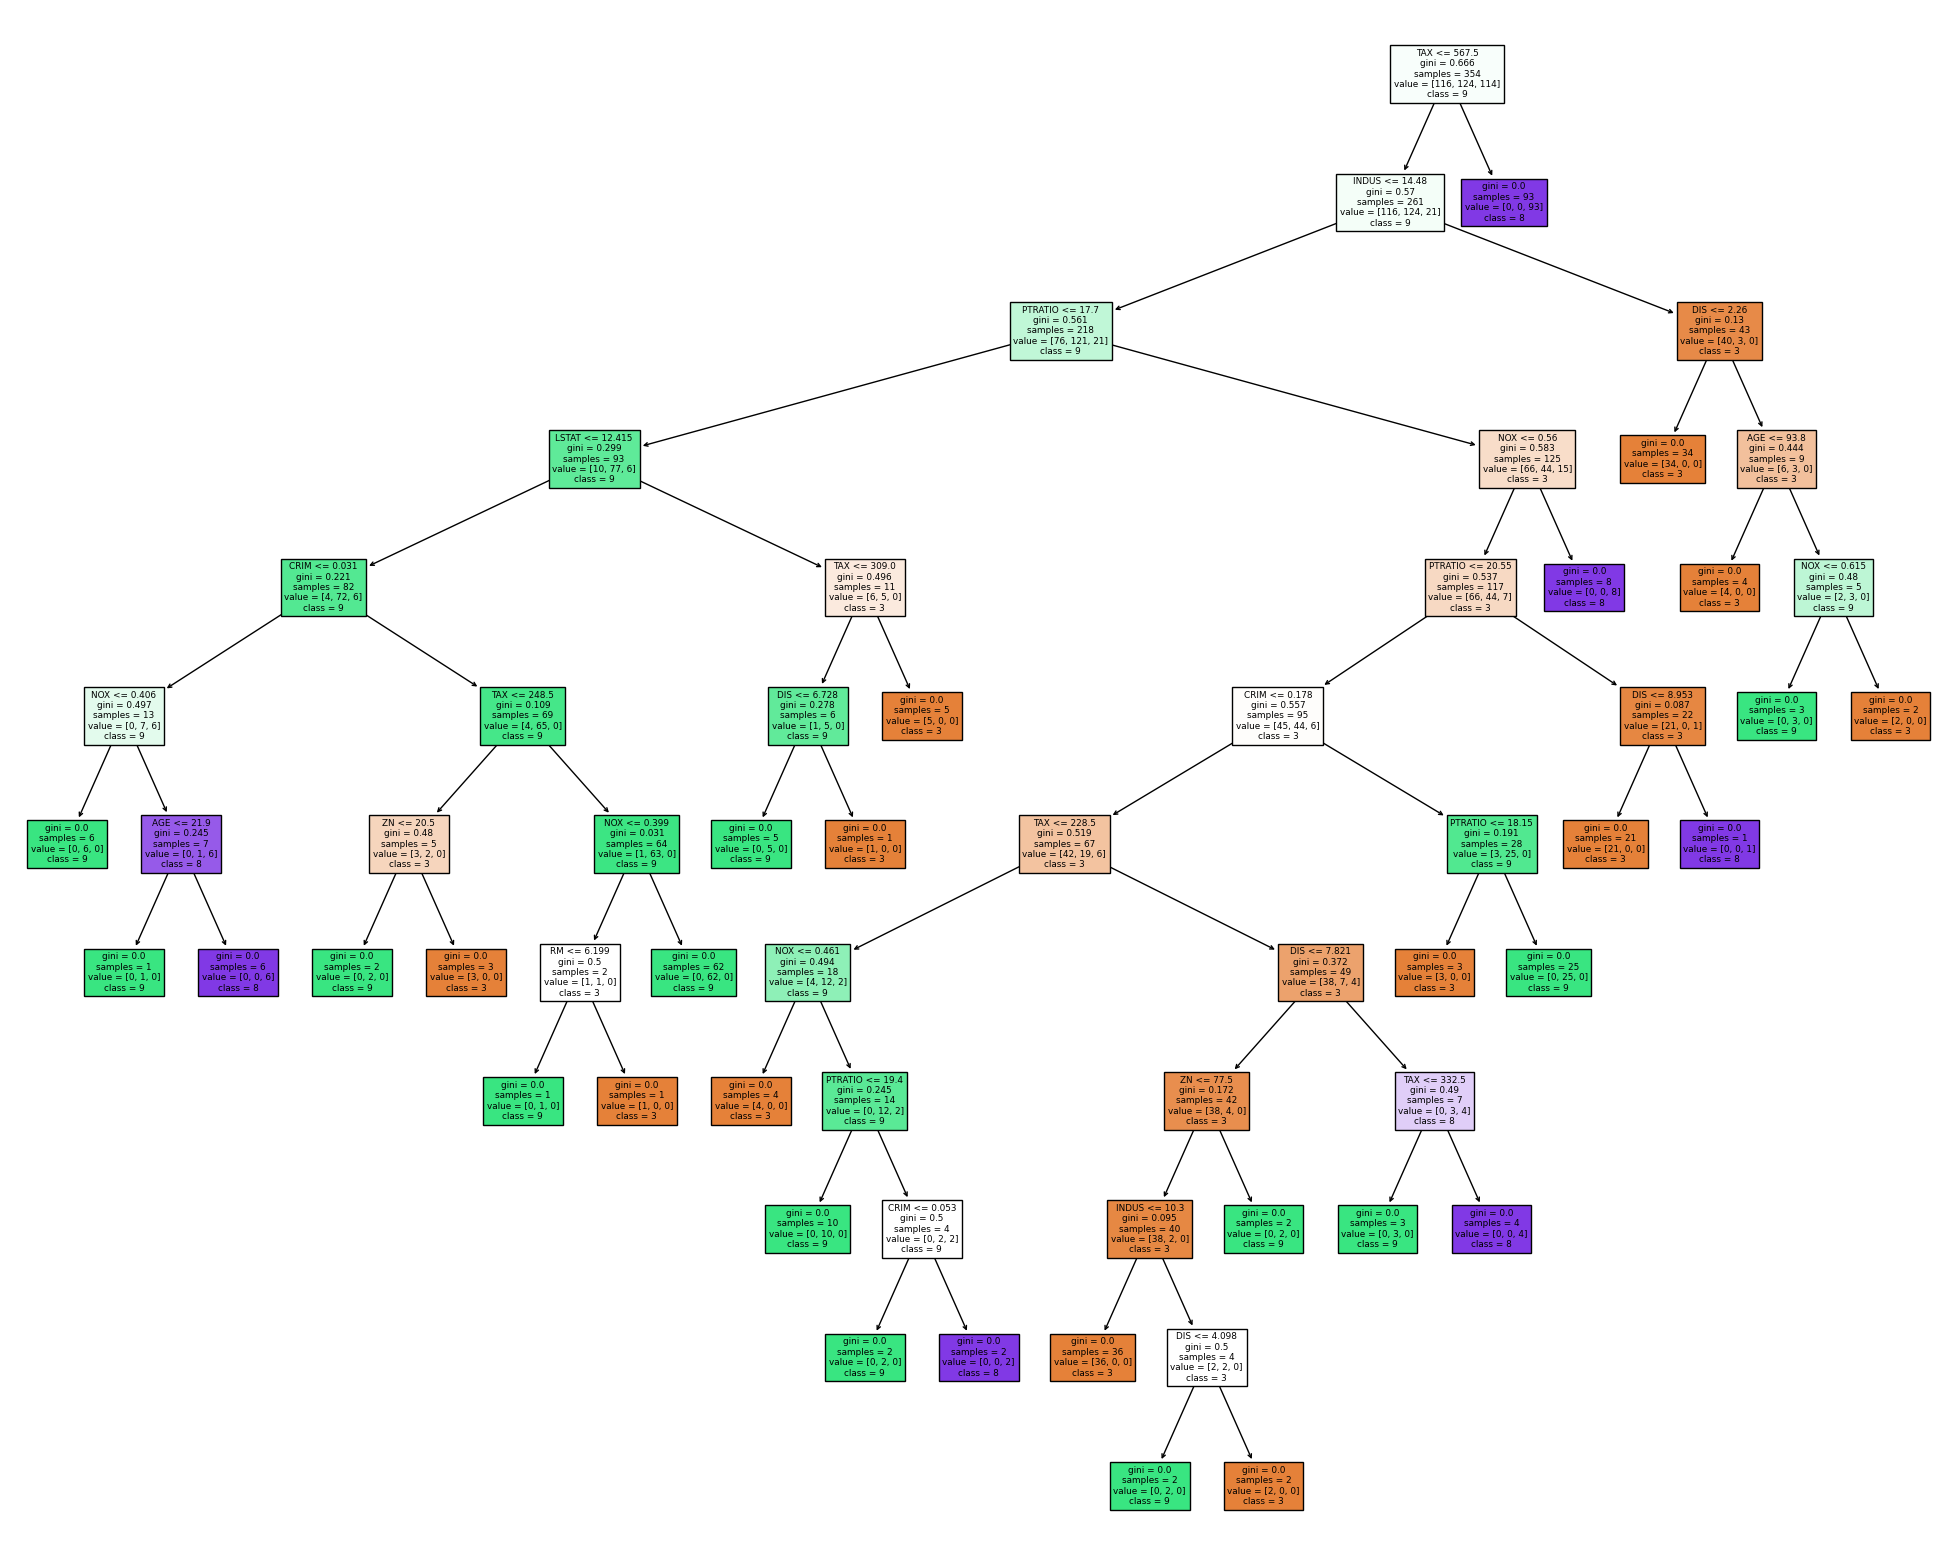

In [58]:
import graphviz
import pydotplus
from sklearn import tree
from IPython.display import Image

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decision_tree, 
                   feature_names=data.feature_names,  
                   class_names=str(result_y.target),
                   filled=True)

## Generate (Td-1) decision trees on the same training set

In [59]:
testScores = []
for i in range(1,depth):
    clf = DecisionTreeClassifier(max_depth=i)
    clf=clf.fit(X_train,y_train)
    print('\nDepth of tree: ',clf.get_depth())
    print('Leaves of tree: ',clf.get_n_leaves())
    train_score=clf.score(X_train,y_train,sample_weight=None)
    test_score=clf.score(X_test,y_test,sample_weight=None)
    print('Train Score: ',train_score)
    print('Test Score: ',test_score)
    feature_importance=clf.feature_importances_
    for i,j in enumerate(feature_importance):
        print('Feature:',X_df.columns[i],'importance:',j)
        testScores.append(test_score)


Depth of tree:  1
Leaves of tree:  2
Train Score:  0.6129943502824858
Test Score:  0.5855263157894737
Feature: CRIM importance: 0.0
Feature: ZN importance: 0.0
Feature: INDUS importance: 0.0
Feature: CHAS importance: 0.0
Feature: NOX importance: 0.0
Feature: RM importance: 0.0
Feature: AGE importance: 0.0
Feature: DIS importance: 0.0
Feature: RAD importance: 0.0
Feature: TAX importance: 1.0
Feature: PTRATIO importance: 0.0
Feature: B importance: 0.0
Feature: LSTAT importance: 0.0

Depth of tree:  2
Leaves of tree:  3
Train Score:  0.7175141242937854
Test Score:  0.6644736842105263
Feature: CRIM importance: 0.0
Feature: ZN importance: 0.0
Feature: INDUS importance: 0.1940017523950831
Feature: CHAS importance: 0.0
Feature: NOX importance: 0.0
Feature: RM importance: 0.0
Feature: AGE importance: 0.0
Feature: DIS importance: 0.0
Feature: RAD importance: 0.0
Feature: TAX importance: 0.8059982476049169
Feature: PTRATIO importance: 0.0
Feature: B importance: 0.0
Feature: LSTAT importance: 0.

In [60]:
maxTestScore = max(testScores)
index = testScores.index(maxTestScore)
clf1 = DecisionTreeClassifier(max_depth=index)
clf1=clf1.fit(X_train,y_train)
print('\nDepth of tree: ',clf1.get_depth())
print('Leaves of tree: ',clf1.get_n_leaves())
train_score=clf1.score(X_train,y_train,sample_weight=None)
test_score=clf1.score(X_test,y_test,sample_weight=None)
print('Train Score: ',train_score)
print('Test Score: ',test_score)
feature_importance=clf1.feature_importances_
for i,v in enumerate(feature_importance):
    print('Feature:',X_df.columns[i],'importance:',v)


Depth of tree:  11
Leaves of tree:  31
Train Score:  1.0
Test Score:  0.9407894736842105
Feature: CRIM importance: 0.08044152799534238
Feature: ZN importance: 0.014577971855664465
Feature: INDUS importance: 0.09642232567960281
Feature: CHAS importance: 0.0
Feature: NOX importance: 0.09428735982500004
Feature: RM importance: 0.0
Feature: AGE importance: 0.006784208509007283
Feature: DIS importance: 0.05988395121430654
Feature: RAD importance: 0.0
Feature: TAX importance: 0.45384712412363426
Feature: PTRATIO importance: 0.1658382612642871
Feature: B importance: 0.0
Feature: LSTAT importance: 0.02791726953315527


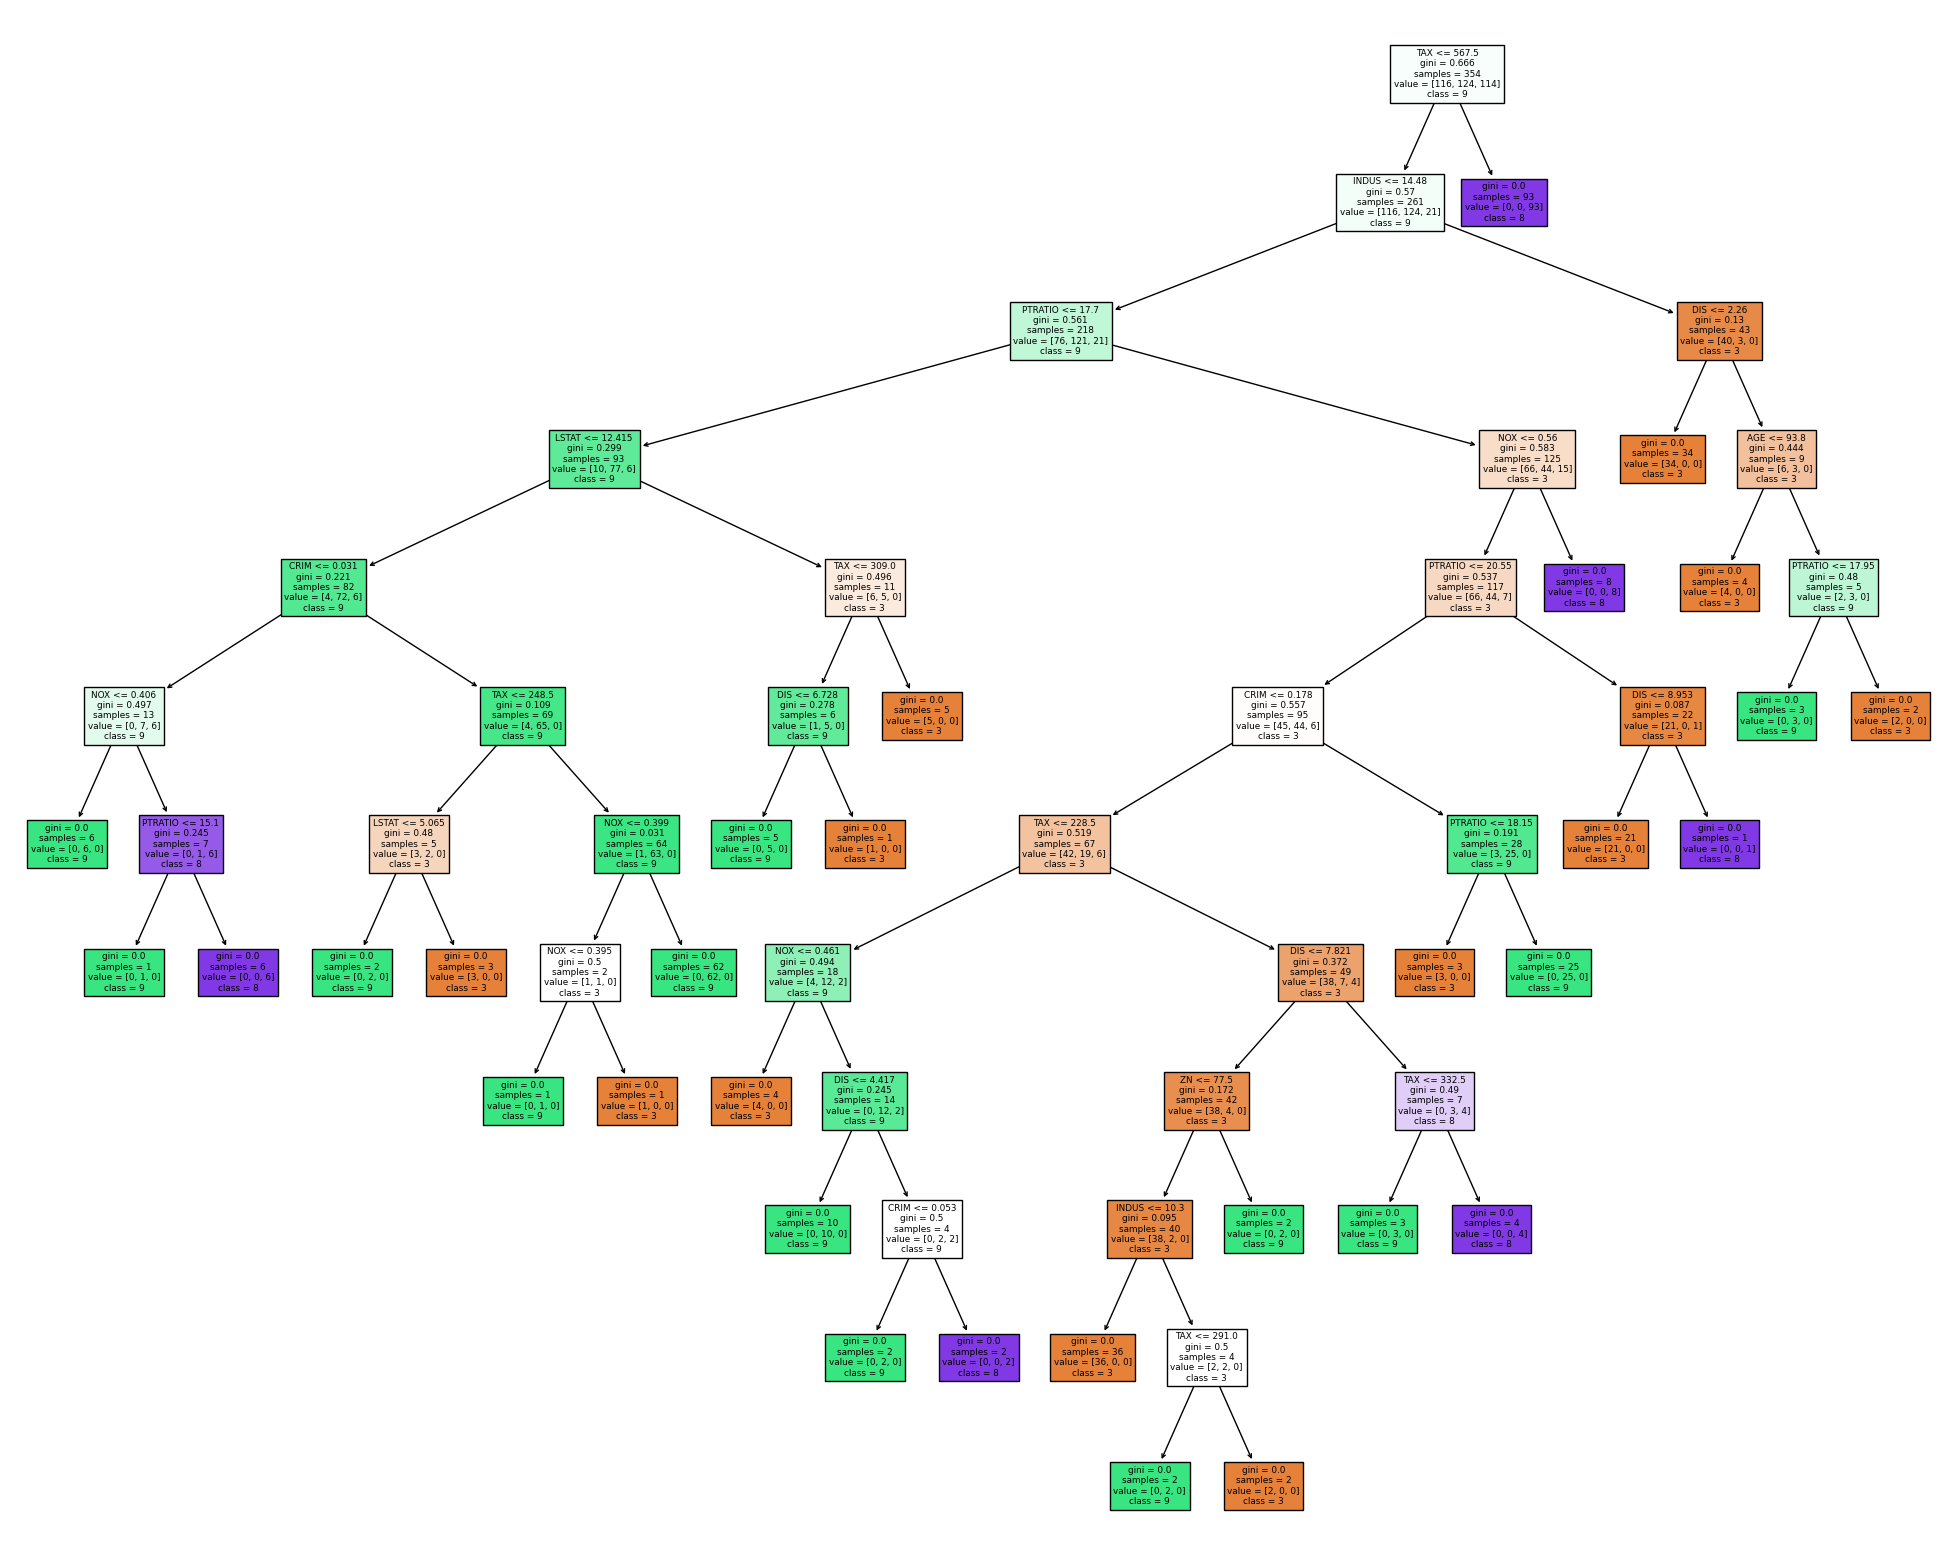

In [61]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf1, 
                   feature_names=data.feature_names,  
                   class_names=str(result_y.target),
                   filled=True)